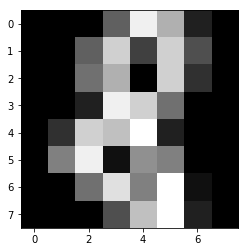

[  0.   0.   0.   2.  13.   0.   0.   0.   0.   0.   0.   8.  15.   0.   0.
   0.   0.   0.   5.  16.   5.   2.   0.   0.   0.   0.  15.  12.   1.  16.
   4.   0.   0.   4.  16.   2.   9.  16.   8.   0.   0.   0.  10.  14.  16.
  16.   4.   0.   0.   0.   0.   0.  13.   8.   0.   0.   0.   0.   0.   0.
  13.   6.   0.   0.]
4
1797


In [2]:
# You can load and split the dataset using this code block:

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
digits= load_digits()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold

x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

# You can view the images using this code snippet:

plt.imshow(np.reshape(x_train[7], (8,8)), cmap=plt.cm.gray)
plt.show()
print(digits.data[100])
print(digits.target[100])
print(len(digits.target))


In [91]:
logreg_ridge = LogisticRegression() # instantiate

c_vals = np.linspace(0.1,100,10)

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x, y)
scores_l2_train = []
scores_l2_test = []
scores_l2_c =[]
scores_l2_split = []
split_count = 0

for c in c_vals:
#     print("L2 Logistic Regression (Ridge)\n")
    split_count = 0
    logreg_ridge = LogisticRegression(C=c)
    for train_index, test_index in skf.split(x, y):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        logreg_ridge.fit(x_train, y_train) # fit
        y_pred = logreg_ridge.predict(x_train) # predict
        acc_log = sum(y_pred == y_train)/len(y_train)*100
#         print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')
    #     print(confusion_matrix(y_train, y_pred))
        scores_l2_train.append(acc_log)

        y_pred = logreg_ridge.predict(x_test) # predict
        acc_log = sum(y_pred == y_test)/len(y_test)*100
#         print('Logistic Regression accuracy of test data:', str(round(acc_log,2)),'%')
    #     print(confusion_matrix(y_test, y_pred))

#         print("\n")
        scores_l2_test.append(acc_log)
        scores_l2_c.append(c)
        split_count = split_count + 1
        scores_l2_split.append(split_count)

In [92]:

data = {"train": scores_l2_train, "test":scores_l2_test, "c":scores_l2_c, "split": scores_l2_split}

# scores_l2 = pd.DataFrame([scores_l2_train, scores_l2_test, scores_l2_c])
scores_l2 = pd.DataFrame(data=data)


scores_l2[scores_l2.columns[::-1]]
# scores_l2
        


#     logreg_lasso = LogisticRegression(penalty='l1')
#     print("L1 Logistic Regression (Lasso)\n")
#     for train_index, test_index in skf.split(x, y):
#     #     print("TRAIN:", train_index, "TEST:", test_index)
#         x_train, x_test = x[train_index], x[test_index]
#         y_train, y_test = y[train_index], y[test_index]

#         logreg_lasso.fit(x_train, y_train) # fit
#         y_pred = logreg_lasso.predict(x_train) # predict
#         acc_log = sum(y_pred == y_train)/len(y_train)*100
#         print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')
#     #     print(confusion_matrix(y_train, y_pred))

#         y_pred = logreg_lasso.predict(x_test) # predict
#         acc_log = sum(y_pred == y_test)/len(y_test)*100
#         print('Logistic Regression accuracy of test data:', str(round(acc_log,2)),'%')
#     #     print(confusion_matrix(y_test, y_pred))

#         print("\n")

,train,test,split,c
0,99.302163,92.032967,1,0.1
1,99.303136,88.674033,2,0.1
2,99.513213,96.100279,3,0.1
3,99.375000,96.078431,4,0.1
4,99.445215,89.295775,5,0.1
5,99.790649,91.758242,1,11.2
6,99.790941,87.292818,2,11.2
7,99.791377,94.150418,3,11.2
8,99.791667,95.238095,4,11.2
9,100.000000,90.422535,5,11.2


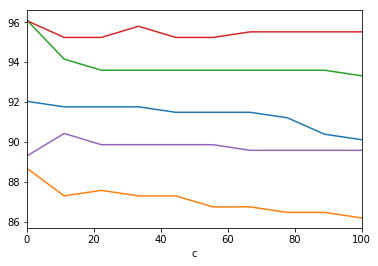

In [93]:
scores_l2.loc[scores_l2['split']==1]

for i in range(1,6):
#     p_train = pd.Series(scores_l2.loc[scores_l2['split']==i]["train"].values, index=scores_l2.loc[scores_l2['split']==1]["c"])
# #     plt.figure()
#     p_train.plot()
    
    p_test = pd.Series(scores_l2.loc[scores_l2['split']==i]["test"].values, index=scores_l2.loc[scores_l2['split']==1]["c"])
#     plt.figure()
    p_test.plot()
    
plt.show()





In [99]:
for c in c_vals:
    print(scores_l2.loc[scores_l2["c"]==c]["test"].mean(),c)

92.43629695082134 0.1
91.77242154289213 11.2
91.60357349252527 22.3
91.66036969166791 33.4
91.49337981879567 44.5
91.38288258122662 55.6
91.3825669620212 66.7
91.27237328829162 77.8
91.10753812345645 88.9
90.94163414332017 100.0


In [114]:
# The highest C value is from 0.1, so using that to run on the data set

logreg_ridge_final = LogisticRegression(C=0.1)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

logreg_ridge_final.fit(x_train, y_train) # fit
y_pred = logreg_ridge_final.predict(x_train) # predict
acc_log = sum(y_pred == y_train)/len(y_train)*100
print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')
print(confusion_matrix(y_train, y_pred))



y_pred = logreg_ridge_final.predict(x_test) # predict
acc_log = sum(y_pred == y_test)/len(y_test)*100
print('Logistic Regression accuracy of test data:', str(round(acc_log,2)),'%')
print(confusion_matrix(y_test, y_pred))


Logistic Regression accuracy of train data: 99.03 %
[[151   0   0   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0   0   1]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   1   0]
 [  0   1   0   0 149   0   0   0   1   0]
 [  0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0 137   0   0   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   5   0   1   0   0   0   0 129   0]
 [  0   0   0   1   0   0   0   0   2 136]]
Logistic Regression accuracy of test data: 95.83 %
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  0  3 36]]


In [105]:
# LASSO REGRESSION

c_vals_l1 = np.linspace(0.1,1000,10)

scores_l1_train = []
scores_l1_test = []
scores_l1_c =[]
scores_l1_split = []

for c in c_vals_l1:
#     print("L1 Logistic Regression (Lasso)\n")
    split_count = 0
    logreg_lasso = LogisticRegression(penalty="l1", C=c)
    for train_index, test_index in skf.split(x, y):
    #     print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        logreg_lasso.fit(x_train, y_train) # fit
        y_pred = logreg_lasso.predict(x_train) # predict
        acc_log = sum(y_pred == y_train)/len(y_train)*100
#         print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')
    #     print(confusion_matrix(y_train, y_pred))
        scores_l1_train.append(acc_log)

        y_pred = logreg_lasso.predict(x_test) # predict
        acc_log = sum(y_pred == y_test)/len(y_test)*100
#         print('Logistic Regression accuracy of test data:', str(round(acc_log,2)),'%')
    #     print(confusion_matrix(y_test, y_pred))

#         print("\n")
        scores_l1_test.append(acc_log)
        scores_l1_c.append(c)
        split_count = split_count + 1
        scores_l1_split.append(split_count)

In [106]:
data = {"train": scores_l1_train, "test":scores_l1_test, "c":scores_l1_c, "split": scores_l1_split}

scores_l1 = pd.DataFrame(data=data)


scores_l1[scores_l1.columns[::-1]]

,train,test,split,c
0,98.534543,92.857143,1,0.1
1,98.606272,90.331492,2,0.1
2,98.331015,94.986072,3,0.1
3,98.263889,96.638655,4,0.1
4,98.474341,91.267606,5,0.1
5,99.930216,90.934066,1,111.2
6,99.930314,86.464088,2,111.2
7,99.930459,93.036212,3,111.2
8,99.930556,95.518207,4,111.2
9,100.000000,90.422535,5,111.2


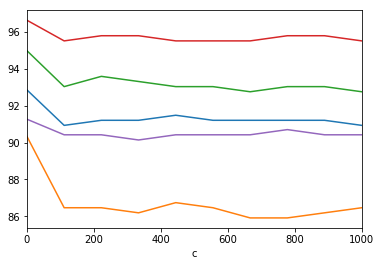

In [109]:
# scores_l1.loc[scores_l1['split']==1]

for i in range(1,6):
#     p_train = pd.Series(scores_l2.loc[scores_l2['split']==i]["train"].values, index=scores_l2.loc[scores_l2['split']==1]["c"])
# #     plt.figure()
#     p_train.plot()
    
    p_test = pd.Series(scores_l1.loc[scores_l1['split']==i]["test"].values, index=scores_l1.loc[scores_l1['split']==1]["c"])
#     plt.figure()
    p_test.plot()
    
plt.show()





In [111]:
for c in c_vals_l1:
    print(scores_l1.loc[scores_l1["c"]==c]["test"].mean(),c)

93.21619361784721 0.1
91.27502170504022 111.2
91.49740978176223 222.3
91.33011282840201 333.4
91.44016043371487 444.5
91.32996675998528 555.6
91.16375921600952 666.7
91.3318299595488 777.8
91.33074055016434 888.9
91.21931139863354 1000.0


In [115]:
# The highest C value is from 0.1, so using that to run on the data set

logreg_lasso_final = LogisticRegression(penalty="l1", C=0.1)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

logreg_lasso_final.fit(x_train, y_train) # fit
y_pred = logreg_lasso_final.predict(x_train) # predict
acc_log = sum(y_pred == y_train)/len(y_train)*100
print('Logistic Regression accuracy of train data:', str(round(acc_log,2)),'%')
print(confusion_matrix(y_train, y_pred))



y_pred = logreg_lasso_final.predict(x_test) # predict
acc_log = sum(y_pred == y_test)/len(y_test)*100
print('Logistic Regression accuracy of test data:', str(round(acc_log,2)),'%')
print(confusion_matrix(y_test, y_pred))


Logistic Regression accuracy of train data: 98.05 %
[[151   0   0   0   0   0   0   0   0   0]
 [  0 145   0   0   0   0   0   0   1   1]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   1   3   1]
 [  0   2   0   0 148   0   0   0   1   0]
 [  0   0   0   0   1 140   1   0   0   0]
 [  0   0   0   0   0   1 135   0   1   0]
 [  0   0   0   0   0   0   0 138   1   1]
 [  0   6   0   1   0   1   0   0 127   0]
 [  0   0   0   1   0   1   0   0   2 135]]
Logistic Regression accuracy of test data: 95.83 %
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 1  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  1  0  0  0  1  0  1  3 35]]
